In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt


In [74]:
data = pd.read_csv('dados_rpm_1hz_sem_ajuste.csv')

In [75]:
resposta = data['rpm']

In [76]:
freq_de_corte = 0.01 # Ajuste conforme necessário
ordem = 2

# Obter os coeficientes do filtro Butterworth
b, a = butter(ordem, freq_de_corte, btype='low', analog=False)

# Aplicar o filtro aos dados
resposta_filtrada = filtfilt(b, a, resposta)
resposta_filtrada = pd.DataFrame(resposta_filtrada)
resposta_filtrada.head()
print(resposta_filtrada.iloc[300:1400].max(), resposta_filtrada.iloc[300:1400].min())

0    8236.706324
dtype: float64 0   -45.377662
dtype: float64


In [77]:
print(resposta_filtrada.values.flatten())

[1056.64513355 1095.89881639 1135.74267944 ...  171.2832739   170.80164451
  170.40471944]


In [78]:
amostras = resposta_filtrada.values.flatten()
num_amostras = len(amostras)

In [79]:
import numpy as np
from scipy.signal import find_peaks

# Encontrar os índices dos picos positivos da senoide
peaks, _ = find_peaks(amostras)
# Calcular o número médio de amostras entre os picos
num_amostras_por_ciclo = np.mean(np.diff(peaks))

# A frequência de amostragem é o número de amostras por ciclo vezes a frequência da senoide
Fs = num_amostras_por_ciclo * 1
print(f"Frequência de amostragem estimada: {Fs} Hz")


Frequência de amostragem estimada: 928.8333333333334 Hz


In [80]:
print(resposta_filtrada.max(), resposta_filtrada.min())

0    8236.706324
dtype: float64 0   -56.877984
dtype: float64


In [81]:
t = np.arange(0, num_amostras / Fs, 1 / Fs)
t = np.array(t)
t = pd.DataFrame(t)

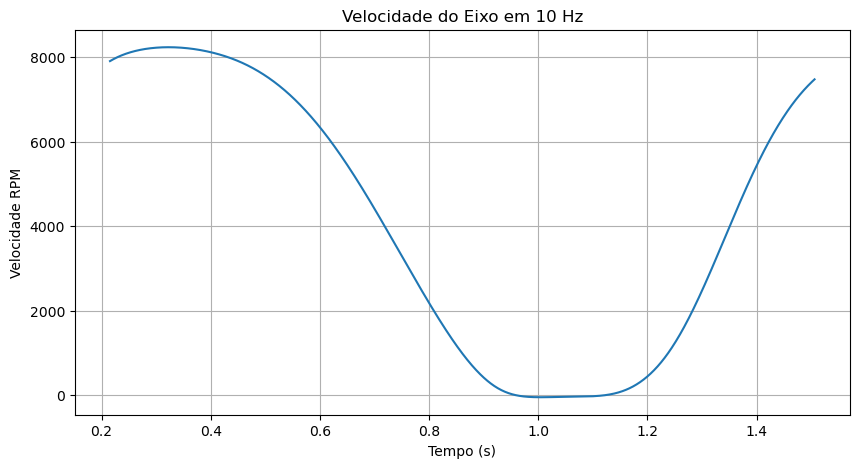

In [82]:
plt.figure(figsize=(10,5))
# plt.plot(data['tempo'].iloc[5:100], data['tensao'].iloc[5:100], label= 'Senoide Ts = 1ms')
plt.plot(t.iloc[200:1400], resposta_filtrada.iloc[200:1400])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade RPM')
plt.title('Velocidade do Eixo em 10 Hz')
plt.grid()
plt.show()

In [83]:
# Valores máximo original e desejado
max_original = 8200
max_desejado = 3800

# Calcular a constante de escala
constante_de_escala = max_desejado / max_original
print(f'Constante de Escala: {constante_de_escala}')


Constante de Escala: 0.4634146341463415


In [84]:
# Ajustar as amostras
data['amostra_ajustada'] = resposta_filtrada * constante_de_escala
data['tempo'] = t

# Exibir as primeiras linhas do DataFrame ajustado para verificar
display(data.iloc[1350:1400])
data.to_csv('dados_rpm_1hz.csv', index=False)


,rpm,amostra_ajustada,tempo
1350,6818.18,3089.006138,1.453436
1351,6437.77,3098.527712,1.454513
1352,6759.66,3107.969849,1.455589
1353,6759.66,3117.332612,1.456666
1354,6759.66,3126.616055,1.457743
1355,6759.66,3135.820236,1.458819
1356,6788.79,3144.945221,1.459896
1357,6759.66,3153.991075,1.460973
1358,6759.66,3162.957857,1.462049
1359,6818.18,3171.845610,1.463126


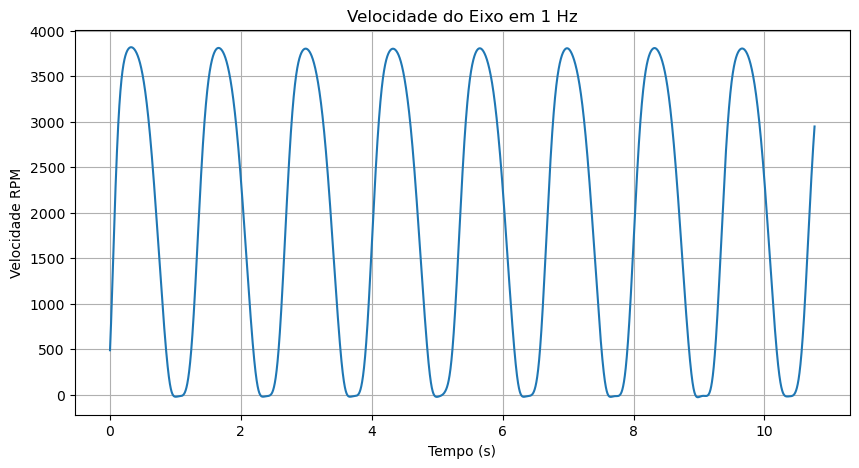

In [85]:
plt.figure(figsize=(10,5))
# plt.plot(data['tempo'].iloc[5:100], data['tensao'].iloc[5:100], label= 'Senoide Ts = 1ms')
plt.plot(t.iloc[:10000], data['amostra_ajustada'].iloc[:10000])
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade RPM')
plt.title('Velocidade do Eixo em 1 Hz')
plt.grid()
plt.show()

In [86]:
data_tensao = pd.read_csv('dados_senoide_1hz.csv')

In [87]:
amplitude1 = data['amostra_ajustada'].iloc[:10000]
t_resumido=t.iloc[:10000]
print(max(amplitude1))
print(min(amplitude1))
t_resumido_lista = t_resumido.values.tolist()

seno = 100*(np.sin(2 * np.pi * 1 * t_resumido))+100
seno = 100*(np.sin(2 * np.pi * 0.85 * np.array(t_resumido_lista)))+100



3817.01024773962
-26.35809018452516


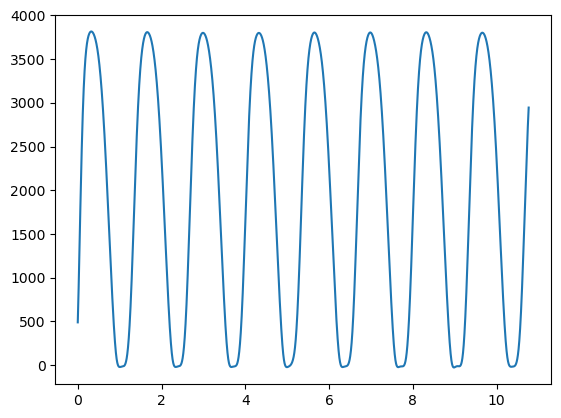

In [88]:
plt.plot(t_resumido, amplitude1)
plt.show()

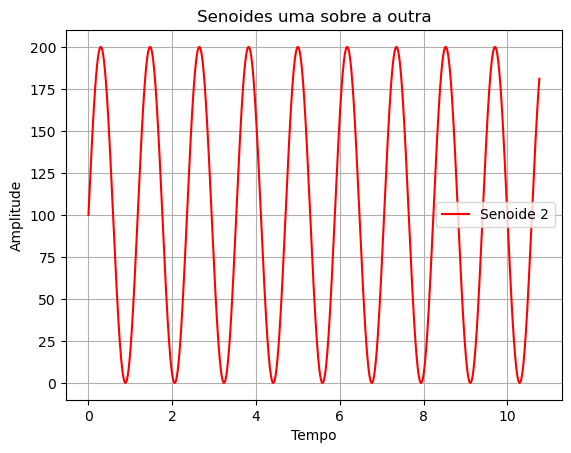

In [89]:
plt.plot(t_resumido, seno, label='Senoide 2', color='red')

plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Senoides uma sobre a outra')
plt.legend()
plt.grid(True)
plt.show()

In [90]:
print(max(data_tensao['tensao'].iloc[:10000]))
print(min(data_tensao['tensao'].iloc[:10000]))

shiftar = max(amplitude1)-((max(amplitude1)-min(amplitude1))/2)
print(shiftar)

200.0
0.0
1895.3260787775473


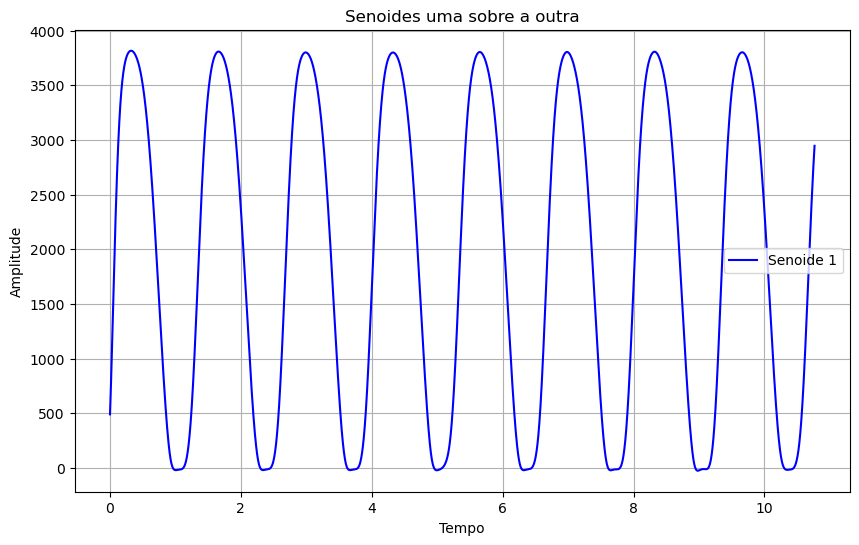

In [91]:
plt.figure(figsize=(10, 6))
plt.plot(t_resumido, amplitude1, label='Senoide 1', color='blue')
# plt.plot(t_resumido, data_tensao['tensao'].iloc[300:1400] + max(amplitude1), label='Senoide 2', color='red')
# plt.plot(t_resumido, data_tensao['tensao'].iloc[300:1400]+max(amplitude1)/2+1050, label='Senoide 2', color='red')

# plt.plot(t_resumido, data_tensao['tensao'].iloc[300:1400]+shiftar-100, label='Senoide 2', color='red')
# plt.plot(t_resumido, seno+shiftar-100, label='Senoide 2', color='red')
# plt.axhline(y=shiftar, color='g', linestyle='--', label='Linha Horizontal')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Senoides uma sobre a outra')
plt.legend()
plt.grid(True)
plt.show()

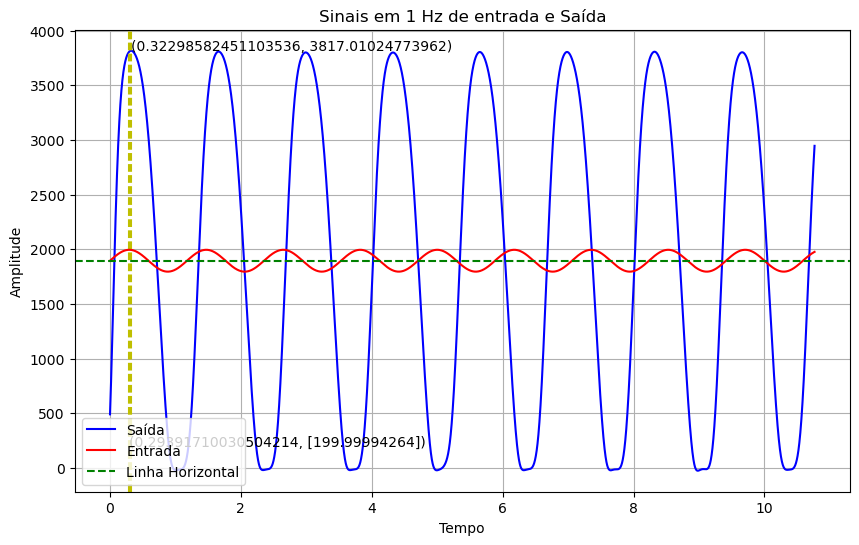

0.029068724205993213
10.464740714157557


In [92]:
data_tensao_shiftada = seno +shiftar-100

plt.figure(figsize=(10, 6))
plt.plot(t_resumido, amplitude1, label='Saída', color='blue')


# Encontrar os picos da senoide
picos, _ = find_peaks(amplitude1)
# Adicionar linhas verticais nos picos
tempo_pico1 = t_resumido.iloc[picos[0]].iloc[0]  # Selecionando um valor específico
valor_pico = amplitude1.iloc[picos[0]]  # Usando o valor correspondente ao pico
plt.axvline(x=tempo_pico1, color='y', linestyle='--')
plt.text(tempo_pico1, valor_pico, f'({tempo_pico1}, {valor_pico})', color='black')


picos, _ = find_peaks(data_tensao_shiftada.squeeze())

# for pico in picos:
tempo_pico2 = t_resumido.iloc[picos[0]].iloc[0]  # Selecionando um valor específico
valor_pico = data_tensao_shiftada[picos[0]] - shiftar + 100  # Usando o valor correspondente ao pico
plt.axvline(x=tempo_pico2, color='y', linestyle='--')
plt.text(tempo_pico2, valor_pico, f'({tempo_pico2}, {valor_pico})', color='black')




plt.plot(t_resumido, data_tensao_shiftada, label='Entrada', color='red')
plt.axhline(y=shiftar, color='g', linestyle='--', label='Linha Horizontal')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Sinais em 1 Hz de entrada e Saída')
plt.legend()
plt.grid(True)
plt.show()


deltaT= tempo_pico1-tempo_pico2
print(deltaT)
fase = 360*deltaT*1
print(fase)

In [93]:
data_tensao_shiftada=(data_tensao['tensao'].iloc[300:1400]+shiftar-100)

ValueError: x and y must have same first dimension, but have shapes (10000, 1) and (1100,)

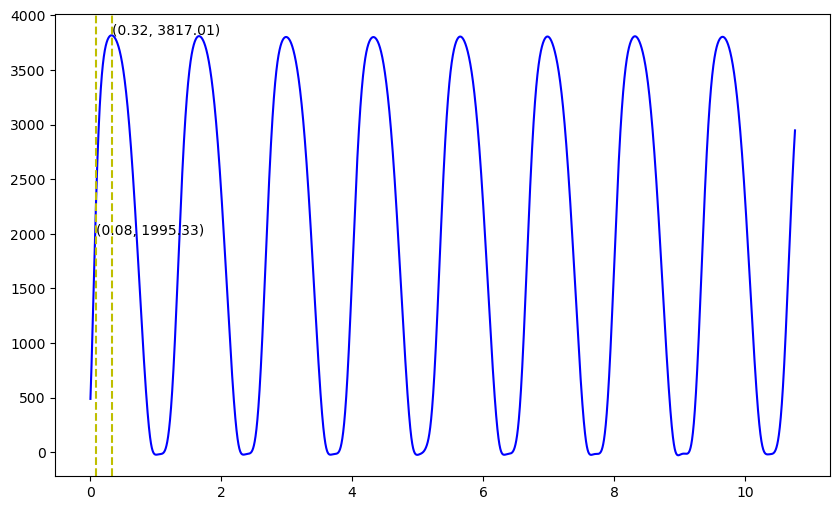

In [94]:
plt.figure(figsize=(10, 6))
plt.plot(t_resumido, amplitude1, label='Senoide 1', color='blue')



# Encontrar os picos da senoide
picos, _ = find_peaks(amplitude1)

# print(type(t))
# t_resumido = t.squeeze()
# print(type(t_resumido))
# print(t.index)
# print(type(amplitude1))



# Adicionar linhas verticais nos picos
# for pico in picos:
tempo_pico1 = t_resumido.iloc[picos[0]].iloc[0]  # Selecionando um valor específico
valor_pico = amplitude1.iloc[picos[0]]  # Usando o valor correspondente ao pico
plt.axvline(x=tempo_pico1, color='y', linestyle='--')
plt.text(tempo_pico1, valor_pico, f'({tempo_pico1:.2f}, {valor_pico:.2f})', color='black')


picos, _ = find_peaks(data_tensao_shiftada)

# for pico in picos:
tempo_pico2 = t_resumido.iloc[picos[0]].iloc[0]  # Selecionando um valor específico
valor_pico = data_tensao_shiftada.iloc[picos[0]]  # Usando o valor correspondente ao pico
plt.axvline(x=tempo_pico2, color='y', linestyle='--')
plt.text(tempo_pico2, valor_pico, f'({tempo_pico2:.2f}, {valor_pico:.2f})', color='black')





plt.plot(t_resumido, data_tensao_shiftada, label='Senoide 2', color='red')
plt.axhline(y=shiftar, color='g', linestyle='--', label='Linha Horizontal')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Senoides uma sobre a outra')
plt.legend()
plt.grid(True)
plt.show()


deltaT= tempo_pico1-tempo_pico2
print(deltaT)
fase = 360*deltaT*10
print(fase)

ValueError: x and y must have same first dimension, but have shapes (12031, 1) and (1100,)

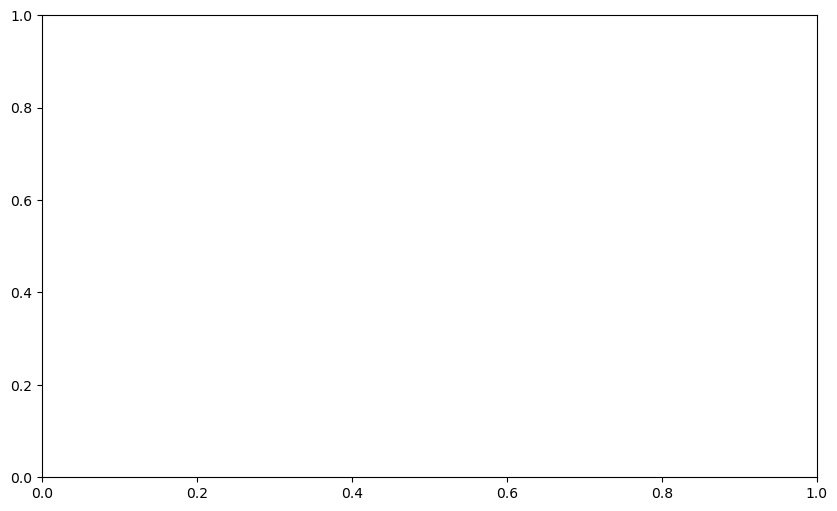

In [ ]:




# Plotar as duas senoides
plt.figure(figsize=(10, 6))
plt.plot(t, amplitude1, label='Senóide 1')
plt.plot(t, data_tensao['tensao'].iloc[300:1400]+ max(amplitude1), label='Senóide 2')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Duas Senoides')
plt.legend()
plt.show()


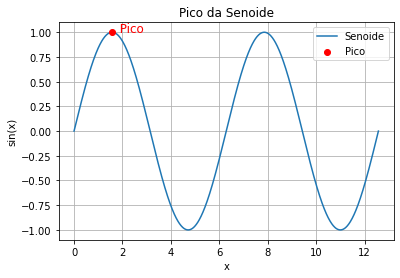

In [ ]:


# Gerar dados da senoide
x = np.linspace(0, 4 * np.pi, 1000)
y = np.sin(x)

# Encontrar o índice do pico (máximo)
peak_index = np.argmax(y)
peak_x = x[peak_index]
peak_y = y[peak_index]

# Plotar a senoide
plt.plot(x, y, label='Senoide')

# Marcar o pico com um 'X'
plt.scatter(peak_x, peak_y, color='red', label='Pico', zorder=5)
plt.text(peak_x, peak_y, '  Pico', color='red', fontsize=12)

# Adicionar legendas e mostrar o plot
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Pico da Senoide')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:


# Supondo que amplitude1 e t estão definidos corretamente

# Encontrar o índice do pico (máximo)
peak_index = np.argmax(amplitude1)
peak_x = t[peak_index]
peak_y = amplitude1[peak_index]

# Plotar a senoide
plt.plot(t, amplitude1, label='Senoide')

# Marcar o pico com um 'X'
plt.scatter(peak_x, peak_y, color='red', label='Pico', zorder=5)
plt.text(peak_x, peak_y, '  Pico', color='red', fontsize=12)

# Adicionar legendas e mostrar o plot
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Pico da Senoide')
plt.legend()
plt.grid(True)
plt.show()


KeyError: 1063

In [ ]:
# Encontrar o índice do pico (máximo)
peak_index = np.argmax(amplitude1)
print(peak_index)

print(len(t))
print(len(amplitude1))

peak_y = amplitude1[peak_index]
print(peak_y)
peak_x = t[peak_index]

# Plotar a senoide
plt.plot(t, amplitude1, label='Senoide')

# Marcar o pico com um 'X'
plt.scatter(peak_x, peak_y, color='red', label='Pico', zorder=5)
plt.text(peak_x, peak_y, '  Pico', color='red', fontsize=12)

# Adicionar legendas e mostrar o plot
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Pico da Senoide')
plt.legend()
plt.grid(True)
plt.show()


1063
1100
1100
2899.399187867535


KeyError: 1063

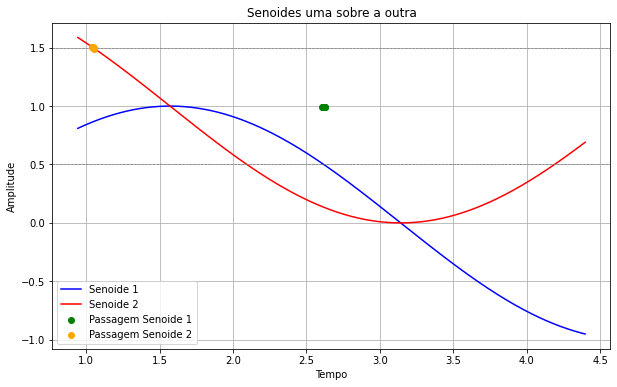

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Supondo que t, amplitude1, e data_tensao['tensao'] já estejam definidos
# Aqui vou criar exemplos fictícios para ilustrar
# Remova estas linhas em seu código real
np.random.seed(0)
t = pd.Series(np.linspace(0, 2 * np.pi, 2000))
amplitude1 = np.sin(t)
data_tensao = pd.DataFrame({'tensao': np.sin(t + np.pi / 2)})

# Intervalo para plotar
start_index = 300
end_index = 1400

# Recortar os dados para o intervalo desejado
t_plot = t.iloc[start_index:end_index]
senoide1 = amplitude1[start_index:end_index]
senoide2 = data_tensao['tensao'].iloc[start_index:end_index] + max(amplitude1)

# Valor desejado para verificar a passagem
valor_desejado1 = 0.5
valor_desejado2 = 0.5 + max(amplitude1)

# Encontrar os pontos onde as senoides passam pelo valor desejado
indices1 = np.where(np.isclose(senoide1, valor_desejado1, atol=0.01))[0]
indices2 = np.where(np.isclose(senoide2, valor_desejado2, atol=0.01))[0]

pontos_t1 = t_plot.iloc[indices1]
pontos_senoide1 = senoide1[indices1]

pontos_t2 = t_plot.iloc[indices2]
pontos_senoide2 = senoide2.iloc[indices2]

# Plotar as senoides
plt.figure(figsize=(10, 6))
plt.plot(t_plot, senoide1, label='Senoide 1', color='blue')
plt.plot(t_plot, senoide2, label='Senoide 2', color='red')

# Marcar os pontos onde as senoides passam pelo valor desejado
plt.scatter(pontos_t1, pontos_senoide1, color='green', label='Passagem Senoide 1', zorder=5)
plt.scatter(pontos_t2, pontos_senoide2, color='orange', label='Passagem Senoide 2', zorder=5)

# Configurar o gráfico
plt.axhline(valor_desejado1, color='gray', linestyle='--', linewidth=0.7)
plt.axhline(valor_desejado2, color='gray', linestyle='--', linewidth=0.7)
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.title('Senoides uma sobre a outra')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
valor_procurado = 2800

In [ ]:
# Encontrar o valor mais próximo de 2800 na coluna 'amostra_ajustada' dentro do intervalo de linhas de 300 a 1400
linha_correspondente = data.loc[:500, 'amostra_ajustada'].iloc[(data.loc[:500, 'amostra_ajustada'] - valor_procurado).abs().idxmin()]

print(f'O valor mais próximo de 2800 na amostra ajustada é: {linha_correspondente}')



O valor mais próximo de 2800 na amostra ajustada é: 2799.9810812473784


In [ ]:
data.to_csv('senoide_rpm_10.csv')

In [ ]:
# # Encontrar o índice da linha onde 'amostra_ajustada' é igual a 2799.9810812473784
# data_linha = data.loc[300:1400, [data['amostra_ajustada'] == 2417.974893119542]].index
# print(data_linha)

# tempo_correspondente = data.loc[464, 'tempo']
# print(tempo_correspondente)
# delta_tempo = tempo_correspondente - 0.2

In [ ]:
delta_tempo = 0.24653173511495385
periodo_senoide = 1/10

In [ ]:
import math

In [ ]:
defasagem_radianos = 2 * math.pi * (delta_tempo / periodo_senoide)
defasagem_graus = math.degrees(defasagem_radianos)

In [ ]:
print(defasagem_graus)

887.5142464138339


In [ ]:
# Ajustar a defasagem para estar dentro do intervalo de -90 a 90 graus
defasagem_graus_ajustada = defasagem_graus % 360  # Trabalhamos em um círculo de 360 graus
if defasagem_graus_ajustada > 90:
    defasagem_graus_ajustada -= 180  # Subtrai 180 para transformar em um valor negativo dentro do intervalo -90 a 90

print(f'A defasagem em graus ajustada é: {defasagem_graus_ajustada}')

A defasagem em graus ajustada é: -12.485753586166084


In [ ]:
# Tempo específico para o qual você quer calcular a defasagem
tempo_especifico = 0.04653173511495385

# Encontrar o índice da linha mais próxima ao tempo específico
indice_tempo_mais_proximo = (data['tempo'] - tempo_especifico).abs().idxmin()

# Frequência da senoide (em Hz)
frequencia_senoide = 60  # Suponha que a frequência seja 60 Hz

# Calcular o período da senoide
periodo_senoide = 1 / frequencia_senoide

# Valor do tempo mais próximo
tempo_correspondente = data.loc[indice_tempo_mais_proximo, 'tempo']

# Calcular o delta de tempo entre o tempo específico e o tempo correspondente na senoide
delta_tempo = 0.04653173511495385

# Calcular a defasagem em graus usando a fórmula delta_phi = 360 * f * delta_tempo
defasagem_graus = 360 * frequencia_senoide * delta_tempo

print(f'A defasagem em graus é: {defasagem_graus}')


defasagem_graus_ajustada = defasagem_graus % 360  # Trabalhamos em um círculo de 360 graus
if defasagem_graus_ajustada > 90:
    defasagem_graus_ajustada -= 180  # Subtrai 180 para transformar em um valor negativo dentro do intervalo -90 a 90

print(f'A defasagem em graus ajustada é: {defasagem_graus_ajustada}')

A defasagem em graus é: 1005.0854784830032
A defasagem em graus ajustada é: 105.08547848300316
